In [11]:
import pandas as pd

In [13]:
df = pd.read_csv('Billionaires_Dataset.csv')

In [15]:
df.head(4)

,name,net_worth,gender,age,birth_year,birth_month,birth_day,industry,self_made,country,gdp_country,cpi_change_country,gross_tertiary_education_enrollment,life_expectancy_country,total_tax_rate_country,population_country
0,Jiang Weiping & family,5500,M,68.0,1955.0,3.0,1.0,Manufacturing,True,China,"$19,910,000,000,000",2.9,50.6,77.0,59.2,1.397715e+09
1,Antonia Ax:son Johnson & family,9200,F,79.0,1943.0,9.0,6.0,Diversified,False,Sweden,"$530,832,908,738",1.8,67.0,82.5,49.1,1.028545e+07
2,Binod Chaudhary,1800,M,67.0,1955.0,4.0,14.0,Diversified,False,Nepal,"$30,641,380,604",5.6,12.4,70.5,41.8,2.860871e+07
3,Chad Richison,2200,M,52.0,1970.0,10.0,10.0,Technology,True,United States,"$21,427,700,000,000",7.5,88.2,78.5,36.6,3.282395e+08


In [17]:
#problem one

In [19]:
((df['age'] < 30).sum()) / (len(df)) 

0.003337505214851898

In [22]:
#problem two

In [24]:
df1 = (df[df['self_made'] == False]) #problem two

In [26]:
df1['industry'].mode() #problem two

0    Fashion & Retail
Name: industry, dtype: object

In [29]:
#problem 3

In [31]:
df2 = df[(df['age'] > 25) & (df['age'] < 45)]

In [33]:
df2[df2['net_worth'] == max(df2['net_worth'])]

,name,net_worth,gender,age,birth_year,birth_month,birth_day,industry,self_made,country,gdp_country,cpi_change_country,gross_tertiary_education_enrollment,life_expectancy_country,total_tax_rate_country,population_country
976,Mark Zuckerberg,64400,M,38.0,1984.0,5.0,14.0,Technology,True,United States,"$21,427,700,000,000",7.5,88.2,78.5,36.6,328239523.0


In [36]:
#problem 4

In [38]:
df.groupby('country')['net_worth'].mean().sort_values(ascending = False).head(3)

country
France     14629.411765
Belgium    13733.333333
Mexico     12746.153846
Name: net_worth, dtype: float64

#challenge problem 1

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
avg_networth_by_month = df.groupby('birth_month')['net_worth'].mean().sort_values(ascending = False)

<Axes: xlabel='birth_month'>

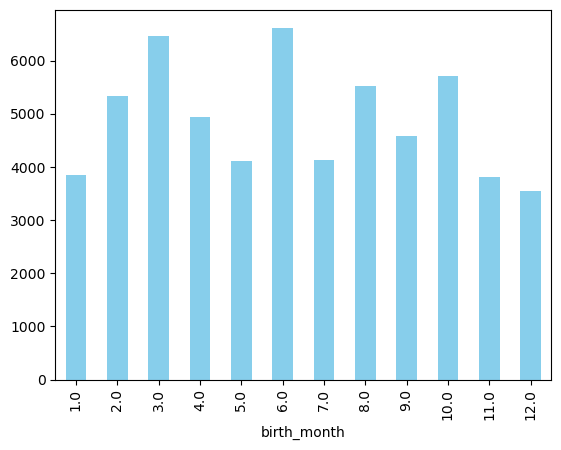

In [46]:
avg_networth_by_month = df.groupby('birth_month')['net_worth'].mean()
avg_networth_by_month.plot(kind='bar', color='skyblue')


In [49]:
q1 = df['net_worth'].quantile(0.25)
q3 = df['net_worth'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [51]:
outliers = (([net_worth for net_worth in df['net_worth'] if net_worth> maximum or net_worth<minimum]))

In [52]:
len(outliers)

226

In [53]:
condition = (df['net_worth'] >= minimum) & (df['net_worth'] <= maximum)

In [54]:
new_df = df[condition]

In [55]:
new_df

,name,net_worth,gender,age,birth_year,birth_month,birth_day,industry,self_made,country,gdp_country,cpi_change_country,gross_tertiary_education_enrollment,life_expectancy_country,total_tax_rate_country,population_country
0,Jiang Weiping & family,5500,M,68.0,1955.0,3.0,1.0,Manufacturing,True,China,"$19,910,000,000,000",2.9,50.6,77.0,59.2,1.397715e+09
2,Binod Chaudhary,1800,M,67.0,1955.0,4.0,14.0,Diversified,False,Nepal,"$30,641,380,604",5.6,12.4,70.5,41.8,2.860871e+07
3,Chad Richison,2200,M,52.0,1970.0,10.0,10.0,Technology,True,United States,"$21,427,700,000,000",7.5,88.2,78.5,36.6,3.282395e+08
4,Tom Ford,2200,M,61.0,1961.0,8.0,27.0,Fashion & Retail,True,United States,"$21,427,700,000,000",7.5,88.2,78.5,36.6,3.282395e+08
5,Don Vultaggio & family,7000,M,71.0,1952.0,2.0,26.0,Food & Beverage,True,United States,"$21,427,700,000,000",7.5,88.2,78.5,36.6,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,David Zalik,1700,M,49.0,1974.0,2.0,2.0,Technology,True,United States,"$21,427,700,000,000",7.5,88.2,78.5,36.6,3.282395e+08
2393,Henry Laufer,2600,M,77.0,1945.0,8.0,13.0,Finance & Investments,True,United States,"$21,427,700,000,000",7.5,88.2,78.5,36.6,3.282395e+08
2394,Andrew Cherng,2500,M,75.0,1948.0,4.0,2.0,Food & Beverage,True,United States,"$21,427,700,000,000",7.5,88.2,78.5,36.6,3.282395e+08
2395,Alice Schwartz,2200,F,96.0,1926.0,7.0,2.0,Healthcare,True,United States,"$21,427,700,000,000",7.5,88.2,78.5,36.6,3.282395e+08


<Axes: xlabel='birth_month'>

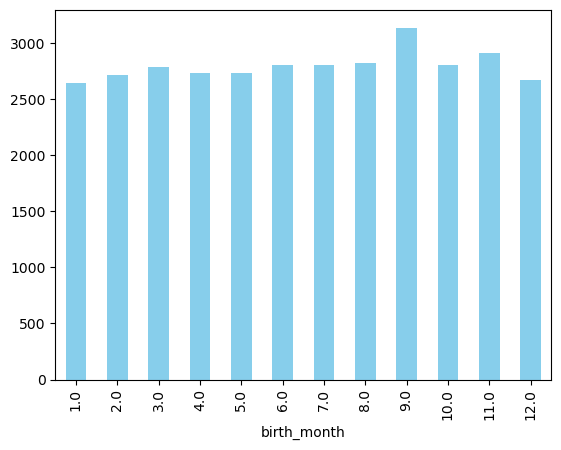

In [56]:
new_avg = new_df.groupby('birth_month')['net_worth'].mean()
new_avg.plot(kind='bar', color='skyblue')

In [57]:
new_df['net_worth'].median() 

2200.0

In [58]:
df['net_worth'].std()

10231.184614287542

In [59]:
new_df['net_worth'].std()

1764.767220801114

In [60]:
df['net_worth'].median()

2400.0

In [82]:

#challenge problem 2

In [84]:
for name in new_df.columns:
    output = new_df.groupby(name)['net_worth'].mean().sort_values(ascending = False).head(1)
    print("{name}:")
    print(output)
    print(      ) 

{name}:
name
Ann Walton Kroenke    8500.0
Name: net_worth, dtype: float64

{name}:
net_worth
8500    8500.0
Name: net_worth, dtype: float64

{name}:
gender
F    3002.362205
Name: net_worth, dtype: float64

{name}:
age
93.0    4857.142857
Name: net_worth, dtype: float64

{name}:
birth_year
1929.0    4957.142857
Name: net_worth, dtype: float64

{name}:
birth_month
9.0    3138.150289
Name: net_worth, dtype: float64

{name}:
birth_day
27.0    3240.0
Name: net_worth, dtype: float64

{name}:
industry
Gambling & Casinos    3180.952381
Name: net_worth, dtype: float64

{name}:
self_made
False    2991.236307
Name: net_worth, dtype: float64

{name}:
country
Nigeria    7150.0
Name: net_worth, dtype: float64

{name}:
gdp_country
$448,120,428,859     7150.0
Name: net_worth, dtype: float64

{name}:
cpi_change_country
11.4    7150.0
Name: net_worth, dtype: float64

{name}:
gross_tertiary_education_enrollment
10.2    7150.0
Name: net_worth, dtype: float64

{name}:
life_expectancy_country
54.3    7150.0